In [ ]:
 !wget 'https://www.manythings.org/anki/ben-eng.zip'
!unzip /content/ben-eng.zip
# ben_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt'
# eng_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/eng.txt'


# with open(ben_txt) as f:
#  ben_lst = f.read().split("\n")[:-1]
# with open(eng_txt) as f:
#  en_lst = f.read().split("\n")[:-1]
# len(ben_lst),len(en_lst)




--2024-01-19 09:55:40--  https://www.manythings.org/anki/ben-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223209 (218K) [application/zip]
Saving to: ‘ben-eng.zip’

ben-eng.zip         100%[===================>] 217.98K  --.-KB/s    in 0.1s    

2024-01-19 09:55:41 (1.52 MB/s) - ‘ben-eng.zip’ saved [223209/223209]

Archive:  /content/ben-eng.zip
  inflating: _about.txt              
  inflating: ben.txt                 


In [ ]:
for line in lines[:20]:
    english, spanish = line.split("\t")
    spanish = "[start] " + spanish + " [end]"
    text_pairs.append((english, spanish))

In [ ]:
ben_lst[:10],len(ben_lst)

(['সে ঘুরে ল্যাংডনের চোখের দিকে তাকায়।',
  'সব মানুষের মধ্যে সমতা আনতে হলে কারও না কারও স্বাধীনতায় হস্তক্ষেপ করতেই হবে।',
  'যাই জিজ্ঞেস কর না কেন, সব প্রশ্নের জবাব দিব ডিনারের পর।',
  'ঠিক যখন আমি সভাকে শুভরাত জানিয়ে বিদায় নিতে উদ্যত, একজন লোক সত্বর আমার কাছে এসে নিজের পরিচয় দেয়।',
  'যেতে দিন!',
  'এবার ক্যামারলেনগো ঘুরে দাঁড়াল আবার, তাকাল অন্য সৈনিকদের দিকে, জোয়ানগণ, আমি আর কোন প্রাণঘাতি ঘটনা দেখতে চাই না এই সন্ধ্যায়।',
  'তাদের ট্যাক্সি এখন কোথায়?',
  'বেশিরভাগ গবেষকই মনে করেন যে, এতসব গুরুত্বপূর্ণ আবিষ্কারের পেছনে নিশ্চয়ই সেপিয়েন্সদের বুদ্ধিবৃত্তিক দক্ষতার কোনো পরিবর্তন দায়ী।',
  'দশকের পর দশক ধরে এসব প্রাণীর জীবাশ্ম আর দেহাবশেষের খোঁজে দুই আমেরিকার পাহাড় ও সমতলে চষে বেড়াচ্ছেন বিশেষজ্ঞরা। যখনই তাঁরা কোনো কিছু খুঁজে পাচ্ছেন পরম যত্নে সেগুলো পাঠিয়ে দিচ্ছেন গবেষণাগারে।',
  'এটা প্রাপ্ত বয়স্কদের জন্য এক রকমের স্কুলও বলা চলে।'],
 2753069)

In [ ]:
NUM_SENTENCES = 20000 # Use only the first 20,000 records.
MAX_NUM_WORDS = 20000 # Use 20,000 words for tokenizing
MAX_SENT_LEN = 20

EMBEDDING_SIZE = 100

LSTM_NEURONS = 100

BATCH_SIZE = 64
EPOCHS = 5

In [ ]:

inputs = []
outputs_i = []
outputs = []

data_file = open('/content/ben.txt', encoding='utf-8')


# 2.7M

In [ ]:
inputs = []
outputs_i = []
outputs = []

data_file = open('ben.txt', encoding='utf-8')

count = 0
for line in data_file:
    count += 1
    if count > NUM_SENTENCES:
        break
    if '\t' not in line:
        continue
    ip, temp_op, extra = line.rstrip().split('\t')
    op_i = '<sos> '+temp_op
    op = temp_op
    inputs.append(ip)
    outputs_i.append(op_i)
    outputs.append(op)

print('Total inputs =', len(inputs))
print('Total intermediate outputs =', len(outputs_i))
print('Total outputs =', len(outputs))
print('\nSample:')
print(inputs[1000])
print(outputs_i[1000])
print(outputs[1000])

Total inputs = 6513
Total intermediate outputs = 6513
Total outputs = 6513

Sample:
I like to eat.
<sos> আমি খেতে ভালোবাসি।
আমি খেতে ভালোবাসি।


In [ ]:
import random

pairs=zip(inputs,outputs)

cnt=0

pairss=[]
for i,j in pairs:
    # print(i)
    pairss.append((i,j))
    cnt+=1



random.shuffle(pairss)

# Display the shuffled pairs
cnt=0
for i,j in pairss:
    print(i,j)
    cnt+=1
    if cnt==4:break


Eisenhower was elected in November 1952. আইজেনহাওয়ার ১৯৫২ সালের নভেম্বরে নির্বাচিত হন।
She hasn't come yet. সে এখনো আসেনি।
I thought Tom was in Boston. আমি ভেবেছিলাম টম বস্টনে।
Where did Tom go to in Australia? টম অস্ট্রেলিয়ায় কোথায় গিয়েছিলেন?


In [ ]:
inputs = []
outputs_i = []
outputs = []

data_file = open('ben.txt', encoding='utf-8')

count = 0
for line in pairss:

    ip, temp_op = line
    op_i = '<sos> '+temp_op
    op = temp_op+ ' <eos>'
    inputs.append(ip)
    outputs_i.append(op_i)
    outputs.append(op)

print('Total inputs =', len(inputs))
print('Total intermediate outputs =', len(outputs_i))
print('Total outputs =', len(outputs))
print('\nSample:')
print(inputs[100])
print(outputs_i[100])
print(outputs[100])

Total inputs = 6513
Total intermediate outputs = 6513
Total outputs = 6513

Sample:
I've got diabetes.
<sos> আমার ডায়াবেটিস আছে।
আমার ডায়াবেটিস আছে। <eos>


In [ ]:
len(baki[6]),len(inputs)

(190, 72327)

In [ ]:
outputs_i[:4],inputs[:4]

([], [])

# ORIG

In [ ]:
from keras.preprocessing.text import Tokenizer

input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(inputs)

inputs_seq = input_tokenizer.texts_to_sequences(inputs)

inputs_word2index = input_tokenizer.word_index
print('Total unique words in input:', len(inputs_word2index))

inputs_numwords = len(inputs_word2index)+1

inputs_maxlen = max(len(s) for s in inputs_seq)
print('Length of longest sentence in input:', inputs_maxlen)

output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(outputs_i + outputs)

outputs_i_seq = output_tokenizer.texts_to_sequences(outputs_i)
outputs_seq = output_tokenizer.texts_to_sequences(outputs)

outputs_word2index = output_tokenizer.word_index
print('Total unique words in output:', len(outputs_word2index))

outputs_numwords = len(outputs_word2index)+1

outputs_maxlen = max(len(s) for s in outputs_seq)
print('Length of longest sentence in output:', outputs_maxlen)

Total unique words in input: 2715
Length of longest sentence in input: 20
Total unique words in output: 5242
Length of longest sentence in output: 19


In [ ]:
print('Total inputs =', len(inputs))
print('Total intermediate outputs =', len(outputs_i))
print('Total outputs =', len(outputs))


Total inputs = 6513
Total intermediate outputs = 6513
Total outputs = 6513


In [ ]:
from keras.preprocessing.sequence import pad_sequences

encoder_input_sequences = pad_sequences(inputs_seq, maxlen=inputs_maxlen,padding='post')
print('encoder_input_sequences shape:', encoder_input_sequences.shape)

decoder_input_sequences = pad_sequences(outputs_i_seq, maxlen=outputs_maxlen, padding='post')
print('decoder_inputs_sequences shape:', decoder_input_sequences.shape)

decoder_output_sequences = pad_sequences(outputs_seq, maxlen=outputs_maxlen, padding='post')
print('decoder_output_sequences shape:', decoder_output_sequences.shape)

encoder_input_sequences shape: (6513, 20)
decoder_inputs_sequences shape: (6513, 19)
decoder_output_sequences shape: (6513, 19)


In [ ]:
id=123

inputs_seq[id],inputs[id],encoder_input_sequences[id]

([147, 24, 4, 667, 151, 113, 266],
 "I'd like to check out tomorrow morning.",
 array([147,  24,   4, 667, 151, 113, 266,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0], dtype=int32))

In [ ]:
# input_tokenizer.texts_to_sequences(inputs),len(outputs_seq)
id=123

outputs_i_seq[id],outputs_i[id],decoder_input_sequences[id]

([1, 3, 216, 501, 693, 2510, 164, 46],
 '<sos> আমি কাল সকালে ঘরটা ছেরে দিতে চাই।',
 array([   1,    3,  216,  501,  693, 2510,  164,   46,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32))

In [ ]:
bigg=[]
pos=[]
avlen=0
lest=0
for i,x in enumerate(outputs_seq):
  avlen+=len(x)
  if 1< len(x)<30 :
    lest+=1
  if len(x)>40:

    bigg.append(x)
    pos.append(i)
len(bigg),pos,avlen//len(inputs),lest

(0, [], 5, 6513)

In [ ]:
bigg[1]

IndexError: list index out of range

In [ ]:
inputs_seq[1321]

[119, 19, 521]

In [ ]:
encoder_input_sequences[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 457], dtype=int32)

In [ ]:
from bnlp import BengaliGlove

bengali_glove = BengaliGlove() # will automatically download pretrained model

ModuleNotFoundError: No module named 'bnlp'

In [ ]:
from numpy import asarray, zeros
embeddings_dict = dict()
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip
glove_file = open('/content/drive/MyDrive/translt/glove.6B.100d.txt', encoding='utf8')

In [ ]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector = asarray(records[1:], dtype='float32')
    embeddings_dict[word] = vector
glove_file.close()

In [ ]:
for i,x in enumerate(embeddings_dict):
  print(x,embeddings_dict[x][:10])
  if i==40:break
import pandas as pd

# Assuming 'embeddings_dict' is a dictionary where keys are strings and values are lists

# Create a Pandas DataFrame
df = pd.DataFrame([(x, embeddings_dict[x][:10]) for x in embeddings_dict], columns=['Key', 'Embeddings[:10]'])

# Display the DataFrame
print(df)


In [ ]:
df.head(50)

,Key,Embeddings[:10]
0,the,"[-0.038194, -0.24487, 0.72812, -0.39961, 0.083..."
1,",","[-0.10767, 0.11053, 0.59812, -0.54361, 0.67396..."
2,.,"[-0.33979, 0.20941, 0.46348, -0.64792, -0.3837..."
3,of,"[-0.1529, -0.24279, 0.89837, 0.16996, 0.53516,..."
4,to,"[-0.1897, 0.050024, 0.19084, -0.049184, -0.089..."
5,and,"[-0.071953, 0.23127, 0.023731, -0.50638, 0.339..."
6,in,"[0.085703, -0.22201, 0.16569, 0.13373, 0.38239..."
7,a,"[-0.27086, 0.044006, -0.02026, -0.17395, 0.644..."
8,"""","[-0.30457, -0.23645, 0.17576, -0.72854, -0.283..."
9,'s,"[0.58854, -0.2025, 0.73479, -0.68338, -0.19675..."


In [ ]:
len(inputs_word2index)+1,MAX_NUM_WORDS

(2716, 50000)

In [ ]:
num_words =min(MAX_NUM_WORDS, len(inputs_word2index)+1)

embedding_matrix = zeros((num_words, EMBEDDING_SIZE))

for word, index in inputs_word2index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from numpy import asarray, zeros

embeddings_dict = dict()

glove_file = open('/content/drive/MyDrive/translt/glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector = asarray(records[1:], dtype='float32')
    embeddings_dict[word] = vector

glove_file.close()

num_words = min(MAX_NUM_WORDS, len(inputs_word2index)+1)

embedding_matrix = zeros((num_words, EMBEDDING_SIZE))

for word, index in inputs_word2index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

**en:2715 bn:5242**

---



In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense

encoder_embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=inputs_maxlen)
decoder_embedding_layer = Embedding(outputs_numwords, LSTM_NEURONS)

In [ ]:
len(decoder_output_sequences),outputs_numwords

(6513, 5243)

In [ ]:
import tensorflow as tf

# Assuming source_vectorization and target_vectorization are TextVectorization layers

batch_size =1000

def format_dataset(eng, ben):
    eng = source_vectorization(eng)
    ben = target_vectorization(ben)
    # print(ben[:,:10] )
    # Ensure ben has the expected shape before slicing
    # ben = tf.reshape(ben, [tf.shape(ben)[0], -1])  # Reshape to 2D
    return {"eng": eng, "ben": ben[:, :-1]}, ben[:, 1:]

def make_dataset(pairs):
    eng_texts, ben_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    ben_texts = list(ben_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.shuffle(2048).prefetch(16).cache()


In [ ]:
import tensorflow as tf
import string
import re
from tensorflow.keras import layers
sequence_length=30
max_token=50000
source_vectorization = layers.TextVectorization(
  max_tokens=max_token,
  output_mode="int",
  output_sequence_length=sequence_length,
  # standardize=custom_standardization
)
target_vectorization = layers.TextVectorization(
  max_tokens=max_token,
  output_mode="int",
  output_sequence_length=sequence_length + 1,

)

In [ ]:
def createVector(pairs,vectorztn):
  batch_size = 10000  # Adjust the batch size based on your available memory
  num_batches = len(pairs) // batch_size + 1

  for i in range(num_batches):
      start_idx = i * batch_size
      end_idx = min((i + 1) * batch_size, len(pairs))
      batch_texts = pairs[start_idx:end_idx]
      vectorztn.adapt(batch_texts)
  # return vectorztn
      # target_vectorization.adapt(batch_ben_texts)  # Uncomment if needed



In [ ]:
len(inputs),len(outputs)

(357768, 357768)

In [ ]:
# createVector(inputs,source_vectorization)
createVector(outputs,target_vectorization)

In [ ]:

vocabulary = source_vectorization.get_vocabulary()

# Access other relevant information
max_tokens = source_vectorization.get_config()['max_tokens']
output_sequence_length = source_vectorization.get_config()['output_sequence_length']
output_mode = source_vectorization.get_config()['output_mode']
standardization = source_vectorization.get_config()['standardize']

# Print or inspect the information
print("Vocabulary:", vocabulary)
print("Max Tokens:", max_tokens)
print("Output Sequence Length:", output_sequence_length)
print("Output Mode:", output_mode)
print("Standardization:", standardization)


Vocabulary: ['', '[UNK]', 'the', 'of', 'and', 'in', 'to', 'a', 'was', 'is', 'as', 'for', 'on', 'he', 'are', 'by', 'with', 'from', 'his', 'at', 'it', 'were', 'bangladesh', 'this', 'an', 'also', 'that', 'or', 'bengal', 'be', 'their', 'dhaka', 'but', 'km', 'have', 'its', 'upazila', 'under', 'which', 'has', 'all', 'had', 'not', 'government', 'there', 'one', 'these', 'after', 'other', 'they', 'been', 'some', 'during', 'about', 'india', 'population', 'two', 'district', '1', 'school', 'into', 'khan', 'area', 'university', 'many', 'however', 'water', 'most', 'east', 'between', 'college', 'people', 'sq', 'number', 'muslim', 'land', 'literacy', 'rural', 'main', 'mosque', 'village', 'first', 'rate', 'him', 'union', 'new', 'time', 'pakistan', 'road', 'others', 'country', 'bangla', 'known', 'century', 'up', 'total', 'only', 'established', 'used', 'female', 'calcutta', 'such', 'national', 'education', 'made', 'years', 'three', 'may', 'institutions', 'important', 'through', 'river', 'over', 'more', '

In [ ]:
 # zeros(( len(inputs), c, outputs_numwords),  dtype='float32')

# replaced this line with tf.onehot
import tensorflow as tf

# requires the padded output sequence to make the onehot output ...
decoder_outputs_onehot  = tf.one_hot(decoder_output_sequences, depth=outputs_numwords)
print('decoder_outputs_onehot shape:', decoder_outputs_onehot.shape)


decoder_outputs_onehot shape: (6513, 19, 5243)


In [ ]:
decoder_outputs = [[156, 410, 2], [21, 1609, 2], [21, 680, 2], [21, 798, 2], [21, 2475, 2]]
padded_decoder_outputs = pad_sequences(decoder_outputs, padding='post')



**MODEL>>>>>>>>>>>>>>>>>>>**

In [ ]:
from tensorflow.keras import layers

encoder_inputs = Input(shape=(inputs_maxlen,),name="eng")
encoder_inputs_emb = encoder_embedding_layer(encoder_inputs)

# attentiion
attention = layers.MultiHeadAttention( num_heads=8, key_dim=64 )
norm=layers.LayerNormalization()

attention_output = attention(encoder_inputs_emb, encoder_inputs_emb, attention_mask=None)
proj_input = norm(encoder_inputs_emb+ attention_output)
# attention END

# encoder
encoder_lstm_1 = layers.LSTM(LSTM_NEURONS, return_sequences=True, return_state=True)
encoder_outputs_1, _, _ = encoder_lstm_1(proj_input)

# Add a second LSTM layer
encoder_lstm_2 = layers.LSTM(LSTM_NEURONS, return_state=True)
encoder_outputs, h, c = encoder_lstm_2(encoder_outputs_1)
encoder_states = [h, c]

encoder_outputs = layers.BatchNormalization()(encoder_outputs)
encoder_outputs = layers.Dropout(0.3)(encoder_outputs)
# encoder END

# decoder
decoder_inputs = Input(shape=(outputs_maxlen,),name="ben")
decoder_inputs_emb = decoder_embedding_layer(decoder_inputs)
decoder = LSTM(LSTM_NEURONS, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder(decoder_inputs_emb, initial_state=encoder_states)


decoder_outputs = layers.BatchNormalization()(decoder_outputs)
decoder_outputs = layers.Dropout(0.8)(decoder_outputs)

# decoder END

output_dense_layer = Dense(outputs_numwords, activation='softmax')
outputs = output_dense_layer(decoder_outputs)

In [ ]:
encoder_inputs = Input(shape=(inputs_maxlen,))
encoder_inputs_emb = encoder_embedding_layer(encoder_inputs)
encoder = LSTM(LSTM_NEURONS, return_state=True)
encoder_outputs, h, c = encoder(encoder_inputs_emb)
encoder_states = [h, c]

decoder_inputs = Input(shape=(outputs_maxlen,))
decoder_inputs_emb = decoder_embedding_layer(decoder_inputs)
decoder = LSTM(LSTM_NEURONS, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder(decoder_inputs_emb, initial_state=encoder_states)

output_dense_layer = Dense(outputs_numwords, activation='softmax')
outputs = output_dense_layer(decoder_outputs)

In [ ]:
decoder_output_sequences.shape

(6513, 19)

In [ ]:
from keras.models import Model

model = Model([encoder_inputs, decoder_inputs], outputs)
model.compile(
          optimizer='rmsprop',
         loss="sparse_categorical_crossentropy",

              metrics=['accuracy'])
print(model.summary())





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 20)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 19)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 20, 100)              271600    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 19, 100)              524300    ['input_2[0][0]']             
                                                                                              

In [ ]:
trn = model.fit([encoder_input_sequences, decoder_input_sequences],
               decoder_output_sequences,
               batch_size=BATCH_SIZE, epochs=50, validation_split=0.3

               )




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


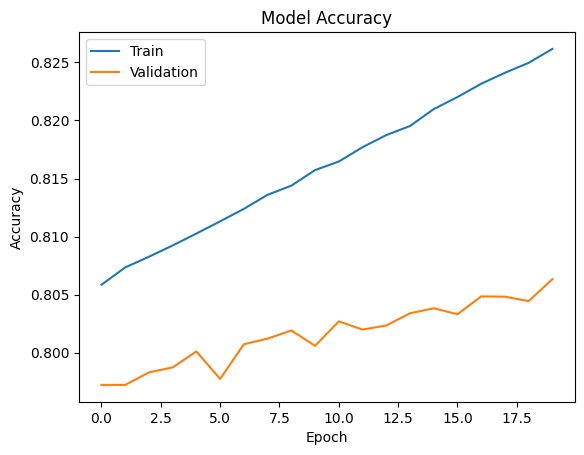

In [ ]:
history=trn
print(history.history.keys())

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


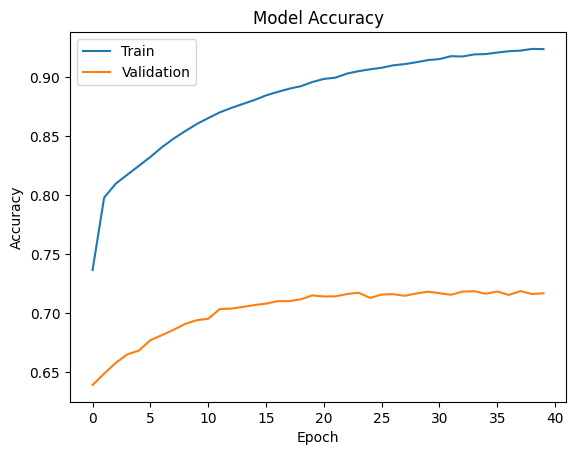

In [ ]:
history=trn
print(history.history.keys())

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
model.save('/content/model_ep-5.h5')

**TEST PHASE!!!**

In [ ]:
from keras.preprocessing.sequence import pad_sequences


def padder_enc(inp):
  decoder_input_sequences = pad_sequences(inp, maxlen=outputs_maxlen, padding='post')
  print('decoder_inputs_sequences shape:', decoder_input_sequences.shape)
  return decoder_input_sequences

import numpy as np


def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(20):
        tokenized_target_sentence = target_vectorization([decoded_sentence])


        next_token_predictions = seq2seq_rnn.predict(
            [tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(next_token_predictions[0, i, :])
        sampled_token = spa_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "[end]":
            break
    return decoded_sentence

test_eng_texts = [pair[0] for pair in test_pairs]
for _ in range(20):
    input_sentence = random.choice(test_eng_texts)
    print("-")
    print(input_sentence)
    print(decode_sequence(input_sentence))

NameError: name 'test_pairs' is not defined

In [ ]:
encoder_model = Model(encoder_inputs, encoder_states) #onion
print(encoder_model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 100)           271600    
                                                                 
 lstm (LSTM)                 [(None, 100),             80400     
                              (None, 100),                       
                              (None, 100)]                       
                                                                 
Total params: 352000 (1.34 MB)
Trainable params: 352000 (1.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
decoder_input_h = Input(shape=(LSTM_NEURONS,))
decoder_input_c = Input(shape=(LSTM_NEURONS,))
decoder_input_states = [decoder_input_h, decoder_input_c]

decoder_input_word = Input(shape=(1,))
decoder_input_word_emb = decoder_embedding_layer(decoder_input_word)

decoder_outputs, h, c = decoder(decoder_input_word_emb, initial_state=decoder_input_states)
decoder_states = [h, c]

outputs = output_dense_layer(decoder_outputs)

In [ ]:
decoder_model = Model([decoder_input_word]+decoder_input_states, [outputs]+decoder_states)
print(decoder_model.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_1 (Embedding)     multiple                     524300    ['input_11[0][0]']            
                                                                                                  
 input_9 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 100)]                0         []                            
                                                                                            

In [ ]:
from numpy import argmax

index_to_word_input = {v:k for k,v in inputs_word2index.items()}
index_to_word_output = {v:k for k,v in outputs_word2index.items()}

def translate(input_seq):
    states = encoder_model.predict(input_seq)

    sos = outputs_word2index['<sos>']
    eos = outputs_word2index['<eos>']

    output_seq = zeros((1, 1))
    output_seq[0, 0] = sos

    output_sentence = []

    for _ in range(outputs_maxlen):
        output_tokens, h, c = decoder_model.predict([output_seq]+states)
        print(output_tokens.shape)
        idx = argmax(output_tokens[0, 0, :])

        if idx == eos:
            break
        word = ''
        if idx > 0:
            word = index_to_word_output[idx]
            output_sentence.append(word)

        states = [h, c]
        output_seq[0, 0] = idx

    return ' '.join(output_sentence)

In [ ]:
encoder_input_sequences[12]

array([96,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [ ]:
from numpy import random

i = random.choice(len(inputs))
input_seq = encoder_input_sequences[i:i+1]
print(input_seq)
translation = translate(input_seq)

print('Input:', inputs[i])

print('Response:', translation)
# input_seq

[[ 22   2 243 113 224   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]
1/1 [==============================] - 0s 18ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 17ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 17ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 18ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 21ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 21ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 17ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 18ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 18ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 19ms/step
(1, 1, 5243)
Input: Are you busy tomorrow night?
Response: আপনি কি আজ রাতে জন্য অপেক্ষা অপেক্ষা করতে পারবেন?


# THE **SEQ2SEQ** model with **` Attention mechanism `**

In [ ]:
!wget https://www.manythings.org/anki/ben-eng.zip
!unzip -q ben-eng.zip

--2024-01-19 13:16:50--  https://www.manythings.org/anki/ben-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223209 (218K) [application/zip]
Saving to: ‘ben-eng.zip’

ben-eng.zip         100%[===================>] 217.98K   340KB/s    in 0.6s    

2024-01-19 13:16:51 (340 KB/s) - ‘ben-eng.zip’ saved [223209/223209]



In [ ]:
text_file = "/content/ben.txt"
with open(text_file) as f:
 lines = f.read().split("\n")[:-1]
text_pairs = []
len(lines)

6513

In [ ]:
for line in lines:
  eng, ben,_ = line.split("\t")
  ben = "[start] " + ben + " [end]"
  text_pairs.append((eng,ben))




In [ ]:
import random
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples:num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples:]

In [ ]:
val_pairs[:10]

[("You're not going to get away with it.",
  '[start] আপনি এর থেকে পার পেয়ে যাবেন না। [end]'),
 ('I am not a doctor.', '[start] আমি ডাক্তার নই। [end]'),
 ('When do you want to go?', '[start] তুই কখন যেতে চাস? [end]'),
 ("I've got proof.", '[start] আমার কাছে প্রমাণ আছে। [end]'),
 ('Humans are healed, but machines are repaired.',
  '[start] মানুষকে সুস্থ করে তোলা হয়, কিন্তু যন্ত্রকে মেরামত কতা হয়। [end]'),
 ('Could you speak a little louder please?',
  '[start] আপনি কি অনুগ্রহ করে আরেকটু জোরে কথা বলতে পারবেন? [end]'),
 ('Where do I claim my baggage?',
  '[start] আমি আমার মালপত্র কোথা থেকে দাবি করব? [end]'),
 ('How old are your children?', '[start] আপনার বাচ্চাদের বয়স কত? [end]'),
 ('You need a friend.', '[start] তোমার একটা বন্ধু লাগবে। [end]'),
 ('This chair is ugly.', '[start] এই চেয়ারটা বিশ্রী দেখতে। [end]')]

In [ ]:
# strip_chars = strip_chars.replace("[", "")
# strip_chars = strip_chars.replace("]", "")
def custom_standardization(input_string):
  lowercase = tf.strings.lower(input_string)
  return tf.strings.regex_replace(
  lowercase, f"[{re.escape(strip_chars)}]", "")

**TOKENS>>>>>>>>>>>>>>>>>>**

In [ ]:
import tensorflow as tf
import string
import re
from tensorflow.keras import layers
sequence_length=20

source_vectorization = layers.TextVectorization(
  max_tokens=30000,
  output_mode="int",
  output_sequence_length=sequence_length,
  # standardize=custom_standardization
)
target_vectorization = layers.TextVectorization(
  max_tokens=30000,
  output_mode="int",
  output_sequence_length=sequence_length + 1,

)

In [ ]:
train_eng_texts = [pair[0] for pair in train_pairs]
train_ben_texts = [pair[1] for pair in train_pairs]
source_vectorization.adapt(train_eng_texts)
target_vectorization.adapt(train_ben_texts)


In [ ]:
source_vocab=source_vectorization.get_vocabulary()
# Create word-to-index dictionaries
word_to_index_source = {word: index for index, word in enumerate(source_vocab)}
len(word_to_index_source)


2284

In [ ]:
import tensorflow as tf

# Assuming source_vectorization and target_vectorization are TextVectorization layers

batch_size = 64

def format_dataset(eng, ben):
    eng = source_vectorization(eng)
    ben = target_vectorization(ben)
    # Ensure ben has the expected shape before slicing
    # ben = tf.reshape(ben, [tf.shape(ben)[0], -1])  # Reshape to 2D
    return {"eng": eng, "ben": ben[:, :-1]}, ben[:, 1:]

def make_dataset(pairs):
    eng_texts, ben_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    ben_texts = list(ben_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.shuffle(2048).prefetch(16).cache()


In [ ]:


import tensorflow as tf

# Sample data
eng_texts = ["Hello", "How are you", "Goodbye"]
ben_texts = ["[start] Bonjour [end]", "[start] Kemon achho [end]", "[start] Bidaye [end]"]

# Create a dataset from the parallel sequences
dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))

# Iterate through the dataset
for eng_text, ben_text in dataset:
    print(f"English: {eng_text.numpy().decode('utf-8')}, Bengali: {ben_text.numpy().decode('utf-8')}")





English: Hello, Bengali: [start] Bonjour [end]
English: How are you, Bengali: [start] Kemon achho [end]
English: Goodbye, Bengali: [start] Bidaye [end]


In [ ]:
import numpy as np
train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)



In [ ]:
for inputs, targets in train_ds.take(1):
  print(f"inputs['english'].shape: {inputs['eng'].shape}")

inputs['english'].shape: (64, 20)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
vocab_size = 50000

In [ ]:
embed_dim = 100
latent_dim = 1024
source = keras.Input(shape=(None,), dtype="int64", name="eng")
x = layers.Embedding(2716, embed_dim,weights=[embedding_matrix], mask_zero=True)(source)
encoded_source = layers.Bidirectional(
 layers.GRU(latent_dim), merge_mode="sum")(x)


In [ ]:
past_target = keras.Input(shape=(None,), dtype="int64", name="ben")
x = layers.Embedding(5243, embed_dim, mask_zero=True)(past_target)

decoder_gru = layers.GRU(latent_dim, return_sequences=True)
x = decoder_gru(x, initial_state=encoded_source)
x = layers.Dropout(0.5)(x)
target_next_step = layers.Dense(5243, activation="softmax")(x)


seq2seq_rnn = keras.Model([source, past_target], target_next_step)
seq2seq_rnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 eng (InputLayer)            [(None, None)]               0         []                            
                                                                                                  
 ben (InputLayer)            [(None, None)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, None, 100)            271600    ['eng[0][0]']                 
                                                                                                  
 embedding_2 (Embedding)     (None, None, 100)            524300    ['ben[0][0]']                 
                                                                                              

In [ ]:
!pip install keras-nlp==0.1.1

In [ ]:
import numpy as np
import keras_nlp

# Reverse mapping from index to word
reverse_source_vocab = source_vectorization.get_vocabulary()
reverse_target_vocab = target_vectorization.get_vocabulary()

keras_nlp.metrics.Bleu(
    tokenizer=None, max_order=4, smooth=False, dtype="float32", name="bleu", **kwargs
)



AttributeError: module 'keras_nlp' has no attribute 'metrics'

In [ ]:
inputs[:10]

In [ ]:
seq2seq_rnn.compile(
 optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])


In [ ]:
trn=seq2seq_rnn.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
72/72 [==============================] - 30s 208ms/step - loss: 5.6619 - accuracy: 0.2447 - val_loss: 4.9917 - val_accuracy: 0.3475
Epoch 2/20
72/72 [==============================] - 3s 44ms/step - loss: 4.7588 - accuracy: 0.3589 - val_loss: 4.7473 - val_accuracy: 0.3556
Epoch 3/20
72/72 [==============================] - 4s 52ms/step - loss: 4.4409 - accuracy: 0.3687 - val_loss: 4.4550 - val_accuracy: 0.3701
Epoch 4/20
72/72 [==============================] - 3s 44ms/step - loss: 4.1731 - accuracy: 0.3841 - val_loss: 4.2673 - val_accuracy: 0.3870
Epoch 5/20
72/72 [==============================] - 3s 45ms/step - loss: 3.9208 - accuracy: 0.4019 - val_loss: 4.1807 - val_accuracy: 0.3941
Epoch 6/20
72/72 [==============================] - 3s 47ms/step - loss: 3.7062 - accuracy: 0.4174 - val_loss: 4.0344 - val_accuracy: 0.4132
Epoch 7/20
72/72 [==============================] - 3s 44ms/step - loss: 3.4840 - accuracy: 0.4346 - val_loss: 3.9040 - val_accuracy: 0.4265
Epoch 8/20


In [ ]:
# Save the entire model (encoder and decoder together)
seq2seq_rnn.save("seq2seq_model.h5")

# # Save the encoder and decoder models separately
# encoder_model.save("encoder_model.h5")
# decoder_model.save("decoder_model.h5")


In [ ]:
from keras.models import load_model

# Load the entire seq2seq model
loaded_seq2seq_rnn = load_model("/content/seq2seq_model.h5")

# Extract the encoder and decoder models from the loaded seq2seq model
loaded_encoder_model = loaded_seq2seq_rnn.layers[2]  # Adjust the layer index accordingly
loaded_decoder_model = loaded_seq2seq_rnn.layers[3]  # Adjust the layer index accordingly


In [ ]:
import numpy as np
spa_vocab = target_vectorization.get_vocabulary()
spa_index_lookup = dict(zip(range(len(spa_vocab)), spa_vocab))
max_decoded_sentence_length = 20

def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])
        next_token_predictions = seq2seq_rnn.predict(
            [tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(next_token_predictions[0, i, :])
        sampled_token = spa_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "end":
            break
    return decoded_sentence

In [ ]:
test_eng_texts = [pair[0] for pair in test_pairs]
for _ in range(10):
 input_sentence = random.choice(test_eng_texts)
 print("-")
 print(input_sentence)
 print(decode_sequence(input_sentence))

In [ ]:
import tensorflow as tf


print('\n\n\n\n\n\n\n')

def format_dataset(eng, ben):
    eng = source_vectorization(eng)

    # Print the original Bengali sentence before tokenization
    tf.print("Original Bengali Sentence:", ben)

    ben = target_vectorization(ben)
    print('kire mama')
    # Print the tokenized Bengali sentence
    tf.print("Tokenized Bengali Sentence:", ben)

    # Ensure ben has the expected shape before slicing
    ben = tf.reshape(ben, [tf.shape(ben)[0], -1])  # Reshape to 2D

    # Prepare inputs and targets for the model
    inputs = {"eng": eng, "ben": ben[:, :-1]}
    targets = ben[:, 1:]

    return inputs, targets



eng_texts = ["Hello", "How are you", "Goodbye"]
ben_texts = ["[start] Bonjour [end]", "[start] Kemon achho [end]", "[start] Bidaye [end]"]

# Create a dataset from the parallel sequences
dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))

dataset = dataset.map(format_dataset)

In [ ]:
# !gdown 'https://docs.google.com/uc?export=download&id=1FLlC0NNXFKVGaVM3-cYW-XEx8p8eV3Wm'
!bunzip2 '/content/hasan-etal-2020-low.tar.bz2'

In [ ]:
import shutil
shutil.unpack_archive('/content/hasan-etal-2020-low.tar', '/content/drive/MyDrive/translt') # this will extract the file to the myfolder directory


In [ ]:

text_file ='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt'
with open(text_file) as f:
 lines = f.read().split("\n")[:-1]
text_pairs = []
len(lines)

In [ ]:
lines[:20]

### **the 2mil dataset!!!!**

In [ ]:
text_file = "/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt"
with open(text_file) as f:
 lines = f.read().split("\n")[:-1]
text_pairs = []
len(lines)

In [ ]:
len(lines)

In [ ]:
mx = 0
snt = ''
pos = 0
ave = 0
nlst = []
overnt=0
undr=0
limit=50
for i, s in enumerate(lines):
    ln = len(s.split())
    if ln<=limit:
      undr+=1

    if ln > limit:
        overnt+=1
        continue  # Skip sentences with length greater than 250

    nlst.append(s)  # Append the sentence to nlst if length is less than or equal to 250

    ave += ln

    if mx < ln:
        mx = ln
        snt = s
        pos = i

# Print or use mx, snt, pos, ave as needed

# Print the new list nlst
print("over {} under {} %={}".format(overnt,undr,(overnt/undr)*100))


In [ ]:
len(lines),len(nlst)

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

lines=nlst

sentence_lengths = [len(sentence.split()) for sentence in lines]

# Count the occurrences of each length
length_counts = Counter(sentence_lengths)

# Extract unique lengths and their counts
unique_lengths = list(length_counts.keys())
counts = list(length_counts.values())

# Plotting
plt.bar(unique_lengths[:70], counts[:70], color='blue')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Lengths')
plt.show()

In [ ]:
ben_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt'
eng_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/eng.txt'


with open(ben_txt) as f:
 ben_lst = f.read().split("\n")[:-1]
with open(eng_txt) as f:
 en_lst = f.read().split("\n")[:-1]
len(ben_lst),len(en_lst)

In [ ]:
text_pairs=[]
for eng,ben in zip(en_lst,ben_lst):
  if len(ben.split())>50:
    continue
  ben = "[start] " + ben + " [end]"
  text_pairs.append((eng,ben))
len(text_pairs)

text_pairs[:10]


In [ ]:
eng_sentences, ben_sentences = zip(*text_pairs)

# Tokenize and count unique words in English sentences
eng_unique_words = set(word for sentence in eng_sentences for word in sentence.split())

# Tokenize and count unique words in Bengali sentences
ben_unique_words = set(word for sentence in ben_sentences for word in sentence.split())

# Print or use the counts as needed
print("Unique words in English sentences:", len(eng_unique_words))
print("Unique words in Bengali sentences:", len(ben_unique_words))


In [ ]:
lim=100
ls=list(eng _unique_words)
for x in range(len(ls)):
  print(ls[x])
  if x>lim:break

In [ ]:
import nltk

# Example reference translations and candidate translations
references = [['i was the best'], ['who are you']]  # List of lists, each containing reference translations
candidates = ['i am the best', 'who are they']  # List of candidate translations

# Tokenize the references
tokenized_references = [[reference.split() for reference in reference_set] for reference_set in references]

# Tokenize the candidates
tokenized_candidates = [candidate.split() for candidate in candidates]

# Compute corpus-level BLEU score
corpus_bleu_score = nltk.translate.bleu_score.corpus_bleu(tokenized_references, tokenized_candidates)
print(f"Corpus BLEU Score: {corpus_bleu_score}")


In [ ]:
 [[reference for reference in reference_set] for reference_set in references]